In [26]:
# 1. Load and Explore Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('D:/Documents/Courses/Data Science/TimeSeries_Forcasting_Project/data/opsd_germany_daily.csv')

# Preview
print(df.shape)
print(df.head())
print(df.info())

(4383, 5)
         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB
None


Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64


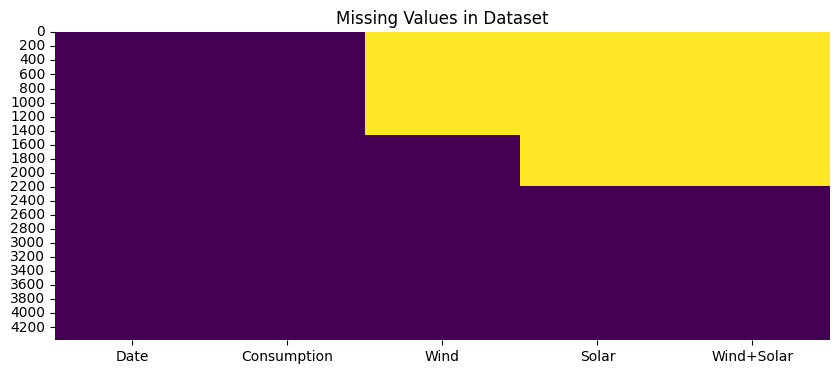

In [27]:
# 2. Check Missing Values

# Count missing values
print(df.isnull().sum())

# Plot missing values
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

In [28]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

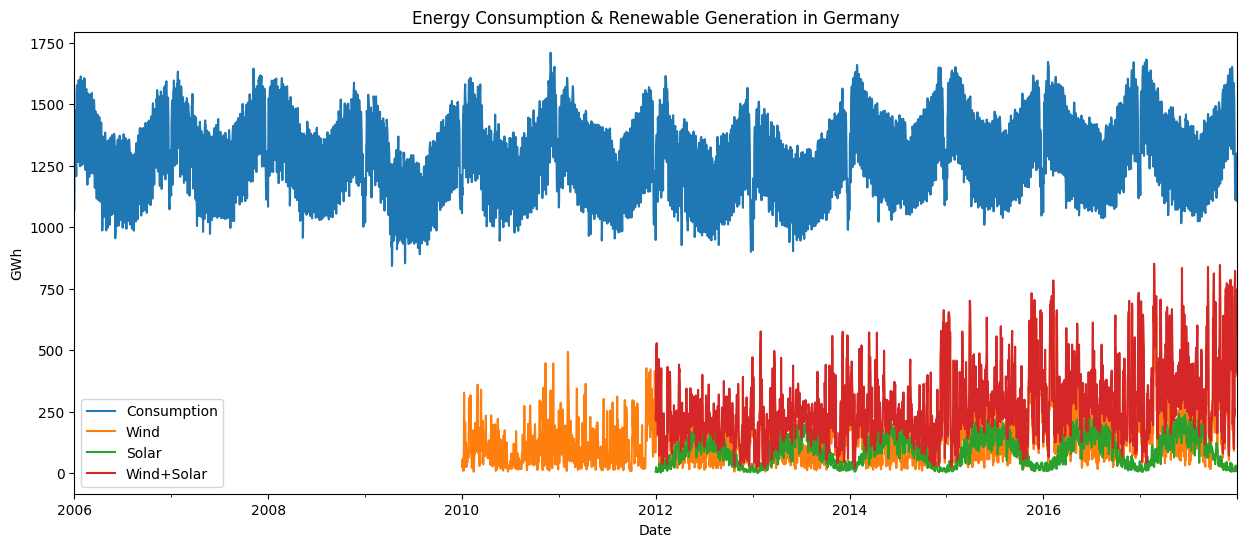

In [29]:
# 3. Visualise Key Trends

# Baisc time-series plot
df[['Consumption','Wind','Solar','Wind+Solar']].plot(figsize=(15,6))
plt.title("Energy Consumption & Renewable Generation in Germany")
plt.ylabel("GWh")
plt.xlabel("Date")
plt.show()

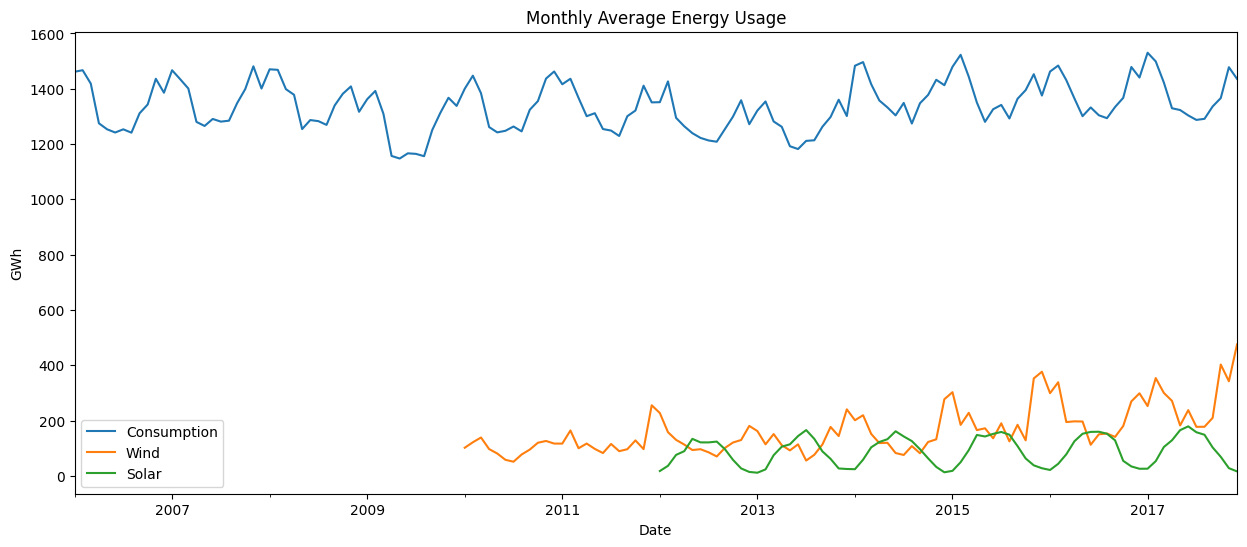

In [30]:
# 4. Resample to Monthly

# Monthly averages
monthly_df = df.resample('ME').mean()

monthly_df[['Consumption', 'Wind', 'Solar']].plot(figsize=(15,6))
plt.title("Monthly Average Energy Usage")
plt.ylabel("GWh")
plt.show()

In [31]:
# 5. Feature Engineering

# Add time-based features
df['year'] = df.index.year
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = df['dayofweek'] >= 5

In [32]:
# 6. Train-Test Split

# Drop rows with missing values
df_clean = df.dropna()

# Feature and Target
X = df_clean.drop(columns=['Consumption'])
y = df_clean['Consumption']

# Simple split (80% train, 20% test based on date)
split_date = '2016-01-01'
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1456, 7) Test: (731, 7)


In [35]:
# 7. Save Data
import joblib

feature_names = X.columns.tolist()

# Save to processed folder
joblib.dump((X_train, X_test, y_train, y_test, feature_names), 'D:/Documents/Courses/Data Science/TimeSeries_Forcasting_Project/data/processed/processed_data.pkl')

['D:/Documents/Courses/Data Science/TimeSeries_Forcasting_Project/data/processed/processed_data.pkl']